## Dimensionality Reduction2
이전 Post: <a href="https://wjddyd66.github.io/others/PCA/">Dimension Reduction</a>에서는 가장 많이 사용되는 PCA에 대하여 알아보았다.

이번 Post에서는 PCA다음으로 많이 사용되는 기법들인 LLE, MDS, Isomap, t-SNE에 대해서 알아보자.  

주로 논문에서 PCA를 통하여 Feature Extracction을 사용하게 되고, Visualization에서 PCA + 다른 기법을 선택하여 다양하게 Visualization하는데 사용되는 것 같다.

## LLE(Locally Linear Embedding)
<a href="http://www.robots.ox.ac.uk/~az/lectures/ml/lle.pdf">Nonlinear Dimensionality Reduction by Locally Linear Embedding</a>

**LLE는 Unsupervised Learning으로서, 서로 인접한 데이터들을 보존(neighborhood-preserving)하면서 고차원의 데이터셋을 저차원으로 축소하는 방법이다.**

**Algorithm**  
1. Select neighbors
2. Reconstruct with linear weights
3. Map to embedded coordinates

<img srcset="https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&amp;fname=http%3A%2F%2Fcfile27.uf.tistory.com%2Fimage%2F990ABA4A5B90BA5006D06A" src="https://t1.daumcdn.net/cfile/tistory/990ABA4A5B90BA5006"><br>
사진 출처: <a href="https://excelsior-cjh.tistory.com/168">excelsior-cjh 블로그</a><br>

**1. Select neighbors, 2. Reconstruct with linear weights**  
<p>$$minimize \vert x_i - \sum_j w_{ij} \cdot x_j \vert^2$$</p>
위의 수식을 살펴보게 되면 처음 High Dimension의 모든 Point(x)에 대하여 k개의 nearest neighbors를 모두 찾게 된다.(k는 Hyperparameter로서 사용자가 직접 지정)  
위와 같은 과정을 거치게 되면 한 점 <span>$x_i$</span>는 nearest neighbors인 <span>$x_j$</span>와 가중치인 <span>$w_{i,j}$</span>의 Lienar Combindation으로서 표현되는 것을 알 수 있다.

**3. Map to embedded coordinates**  
<p>$$minimize \vert y_i - \sum_j w_{ij} \cdot y_j \vert^2$$</p>

**위의 수식을 살펴보게 되면, 위에서 얻은 HighDimension이였던 <span>$x_i$</span>를 잘 표현하는 LowDimension<span>$y_i$</span>로서 표현하는 것을 목표로 하고 있다. 이때 주변 정보들과의 Linear Combination의 Informatino은 그대로 가져오는 것이 LLE의 핵심 아이디어 이다.**(실제 Weight가 Update방식 이나, 추가적인 제약사항등이 궁금하시면 <a href="https://excelsior-cjh.tistory.com/168">excelsior-cjh 블로그</a> 혹은 <a href="http://www.robots.ox.ac.uk/~az/lectures/ml/lle.pdf">Paper</a>를 참조하시면 좋을 것 같습니다.)

## MDS(Multi-Dimensional Scaling)
**MDS는 원 공간(High Dimension) x에서 모든 점들 간에 정의된 거리행렬이 주어진 경우, Embedding Space(Los Dimension)에서의 Euclidian Distance와 거리행렬의 차이가 최소가 되도록 Dimension Reduction하는 방법 이다.**

<p>$$minimize \sum_{i < j} \left( \vert y_i - y_j \vert - \delta_{ij} \right)^2$$</p>

<img src="http://postfiles9.naver.net/20140805_264/kmkim1222_1407201064219Rfw0K_PNG/%B1%D7%B8%B24.png?type=w1"><br>
사진 출처: <a href="http://blog.naver.com/PostView.nhn?blogId=kmkim1222&logNo=220082090874&parentCategoryNo=&categoryNo=24&viewDate=&isShowPopularPosts=false&from=postView">미니 블로그</a><br>

단순한 Distance의 총합이 Minimize하는데 LossFunction을 세웠으므로, 가까운 거리나 멀리 있는 Data끼리의 거리에 대하여 같은 Error값이여도 동일하게 판단합니다. => 가까운 점들간의 Dimension Reduction은 잘 수행하지 못합니다.

Data의 특성을 고려하지 않고 단순히 Distance에 Focus를 맞췄으므로, Dimension Reduction이 잘 되었다고 생각할 수 없습니다.

## ISOMAP
ISOMAP은 LLE와 MDS를 모두 고려한 방법이라고 생각할 수 있다.  
먼저, MDS에서 Distance만 고려하는 경우를 생각하면 다음과 같은 단점이 생길 수 있다.  
<img src="https://i.imgur.com/YeDG7pl.png"><br>
사진 출처: <a href="https://woosikyang.github.io/first-post.html">woosikyang</a><br>

단순한 Euclidian Distance로 계산하였을 경우에는 거리가 거의 차이가 나지 않지만, 측지거리로서 계산하면 많은 차이가 나는 것을 확인할 수 있습니다.

**Algorithm**
1. 고정된 기준값(Threshold)보다 가까운 경우의 모든 두 점을 서로 연결한다. 개수는 k개이며 k는 Hyperparameter로서 지정한다.
2. 두 점i와 j에 대하여 다음과 같은 작업을 거친다.
  - <span>$d_G(i,j) = d_X(i,j)$</span>: 두 점이 연결되어 있다.
  - <span>$d_G(i,j) = \inf$</span>: 두 점이 연결되지 않았다.
  - <span>$d_G(i,j) = min(d_G(i,j),d_g(i,k)+d_G(k,i))$</span>로서 반환한다.
3. MDS방법론을 사용하여 d차원 Embedding을 구축한다.

위와 같은 과정은 다음과 같이 나타낼 수 있다.
<img src="https://lovit.github.io/assets/figures/embedding_for_vis_isomap_flow.png"><br>
사진 출처: <a href="https://lovit.github.io/nlp/representation/2018/09/28/mds_isomap_lle/">lovit 블로그</a><br>

즉, MDS에서 문제였던 단순한 Euclidian Distance만을 사용하였던 문제를 해결한 방법이라고 생각할 수 있다.

## t-SNE
t-SNE(Stochastic neighborhood embedding SNE)는 LLE의 단점이였던 k개의 neighbor를 선택해야 한다는 문제를 해결한 것 이다.  
<a href="https://wjddyd66.github.io/machine%20learning/Theory(8)K-Means-Clustering-and-Gaussian-Mixture-Model(3)/">K-Means Clustering and Gaussian Mixture Model</a>에서 K-Means는 Hard Clustering으로서 Classification을 하고(LLE와 동일), Gaussian Mixture Model은 Soft Clustering으로서 Probability로서 Classification(t-SNE)한다고 설명하였다.

즉, t-SNE도 위와 같은 이유로서 Hard Clustering인 LLE에서 Soft Clustering으로서 변화시킨 방법이라고 생각할 수 있다.

- <span>$p_{j \vert i} = \frac{exp(- \vert x_i - x_j \vert^2 / 2 \sigma_i^2)}{\sum_{k \neq i} exp(- \vert x_i - x_k \vert^2 / 2 \sigma_i^2)}$</span>: High Dimension p에서 i번 째<span>$x_i$</span>가 주어졌을 때 j번 째이웃<span>$x_j$</span>가 선택될 확률
- <span>$q_{ij} = \frac{ \left( 1 + \vert y_i - y_j \vert^2 \right)^{-1} }{\sum_{k \neq l} \left( 1 + \vert y_k - y_l \vert^2 \right)^{-1} }$</span>: Low Dimension q에서 i번 째<span>$y_i$</span>가 주어졌을 때 j번 째이웃<span>$y_j$</span>가 선택될 확률 => t-Disturibution (Crowding Probelm: Gaussian Distribution은 Tail이 얇기 때문에 특정 거리 이상부터는 값의 차이가 거의 없기 때문에 t-Distribution으로 변형)

서로 다른 Dimension의 Distribution을 줄이기 위하여 CostFunciton으로서는 <a href="https://wjddyd66.github.io/machine%20learning/Theory(8)K-Means-Clustering-and-Gaussian-Mixture-Model(3)/#89-derivation-of-em-algorithm">KL-Divergence</a>를 사용하여 다음과 같이 나타낸다.  
<p>$$
\begin{align*}
Cost&=\sum _{ i }^{  }{ KL({ P }_{ i }||{ Q }_{ i }) }  =\sum _{ i }^{  }{ \sum _{ j }^{  }{ { p }_{ j|i }\log { \frac { { p }_{ j|i } }{ { q }_{ j|i } }  }  }  }
\end{align*}$$</p>

위의 식을 살펴보게 되면 각 점 Point에 따라서 <span>$\sigma_i$</span>의 값은 달라질 수 있습니다. 즉, <span>$p_{j \vert i} \neq p_{i \vert j}$</span>이므로 다음과 같은 과정으로 다시 구하게 됩니다.

<p>$${ p }_{ ij }=\frac { { p }_{ j|i }+{ p }_{ i|j } }{ 2 } ,\quad { q }_{ ij }=\frac { { q }_{ j|i }+{ q }_{ i|j } }{ 2 }$$</p>
<p>$$\begin{align*}
Cost&=\sum _{ i }^{  }{ KL({ P }_{ i }||{ Q }_{ i }) } =\sum _{ i }^{  }{ \sum _{ j }^{  }{ { p }_{ ij }\log { \frac { { p }_{ ij } }{ { q }_{ ij } }  }  }  } \\ \frac { \partial C }{ \partial { y }_{ i } } &=4\sum _{ j }^{  }{ ({ y }_{ j }-{ y }_{ i })({ p }_{ ij }-{ q }_{ ij }) }
\end{align*}$$</p>

위와 같은 최종적인 Cost Functino을 통하여 Gradient Descent방식으로 Update해나간다.

t-SNE의 자세한 내용은 <a href="https://lovit.github.io/nlp/representation/2018/09/28/tsne/">lovit Blog</a>를 참조하시길 바랍니다.

## Setup

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "dim_reduction"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

**Sklearn Code & Visualization**
- LLE
  - Reduction Dimension: 2
  - Num of Neighbor: 10
- MDS
  - Reduction Dimension: 2
- ISOMAP
  - Reduction Dimension: 2
  - Num of Neighbor: 5(Default)

/home/jyhwang/anaconda3/envs/dann/lib/python3.7/site-packages/sklearn/utils/extmath.py:530: RuntimeWarning: invalid value encountered in multiply
  v *= signs[:, np.newaxis]


Saving figure other_dim_reduction_plot


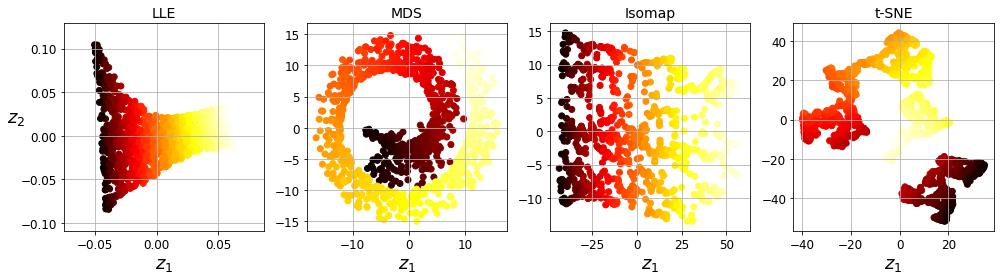

In [5]:
from sklearn.datasets import make_swiss_roll

# Dataset
X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=41)

# LLE
from sklearn.manifold import LocallyLinearEmbedding
lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10, random_state=42)
X_reduced_LLE = lle.fit_transform(X)

# MDS
from sklearn.manifold import MDS
mds = MDS(n_components=2, random_state=42)
X_reduced_mds = mds.fit_transform(X)

# Isomap
from sklearn.manifold import Isomap
isomap = Isomap(n_components=2)
X_reduced_isomap = isomap.fit_transform(X)

# t-SNE
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=42)
X_reduced_tsne = tsne.fit_transform(X)

# Visualization
titles = ["LLE", "MDS", "Isomap", "t-SNE"]

plt.figure(figsize=(14,4))

for subplot, title, X_reduced in zip((141, 142, 143, 144), titles,
                                     (X_reduced_LLE,X_reduced_mds, X_reduced_isomap, X_reduced_tsne)):
    plt.subplot(subplot)
    plt.title(title, fontsize=14)
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot)
    plt.xlabel("$z_1$", fontsize=18)
    if subplot == 141:
        plt.ylabel("$z_2$", fontsize=18, rotation=0)
    plt.grid(True)

save_fig("other_dim_reduction_plot")
plt.show()